# 🚗 Car Price Prediction with Linear Regression

Ever wondered how the price of a used car is estimated?
In this project, we’ll dig into a car dataset and use **`Linear Regression`** to predict how much a car might sell for based on its features. Along the way, we will do some visual analysis to understand what drives the price and train a model using `scikit-learn`.


## Step 1: Importing Libraries
We will start by importing the essential libraries for data analysis, visualization, and model building.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style='whitegrid')


## Step 2: Load the Dataset
Let’s import our dataset and take a quick look to get familiar with it.


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Car Price Prediction/CarPrice_Assignment.csv")  # adjust path if needed
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 3: Initial Data Inspection
First we will understand what the dataset looks like — data types, missing values, and basic stats.


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


## Step 4: Exploratory Data Analysis (EDA)
Now its time to visualize and understand what affects car prices the most.  
We'll look at how price relates to other variables like car age, present price, fuel type, etc.


/tmp/ipython-input-6-3570622165.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


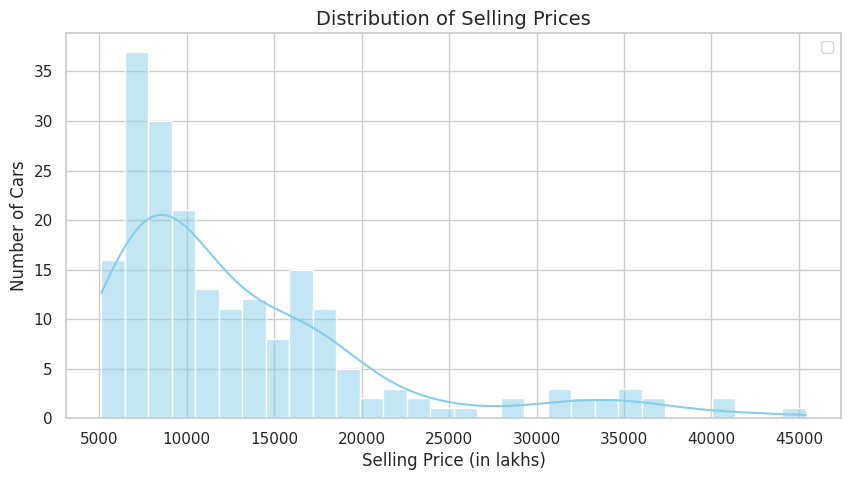

In [6]:
# Selling Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
#sns.kdeplot(df['price'], color='crimson', linewidth=2)
plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price (in lakhs)')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()


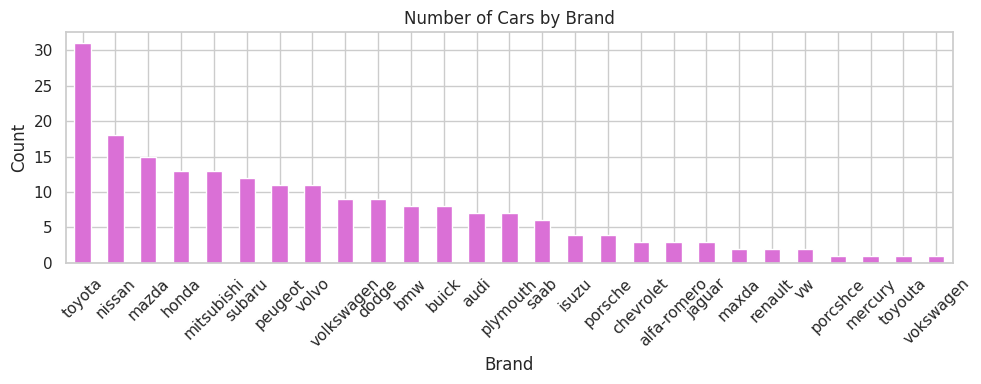

In [7]:
# Unique Car Brands
# Extract brand from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['brand'].value_counts().plot(kind='bar', color='orchid', figsize=(10, 4))
plt.title("Number of Cars by Brand")
plt.ylabel("Count")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-3770565589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fueltype', y='price', palette='Set3')


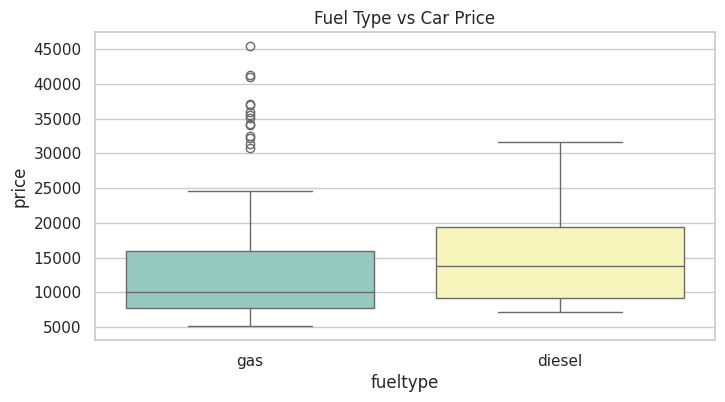

In [9]:
# Fuel Type vs Price
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='fueltype', y='price', palette='Set3')
plt.title("Fuel Type vs Car Price")
plt.show()


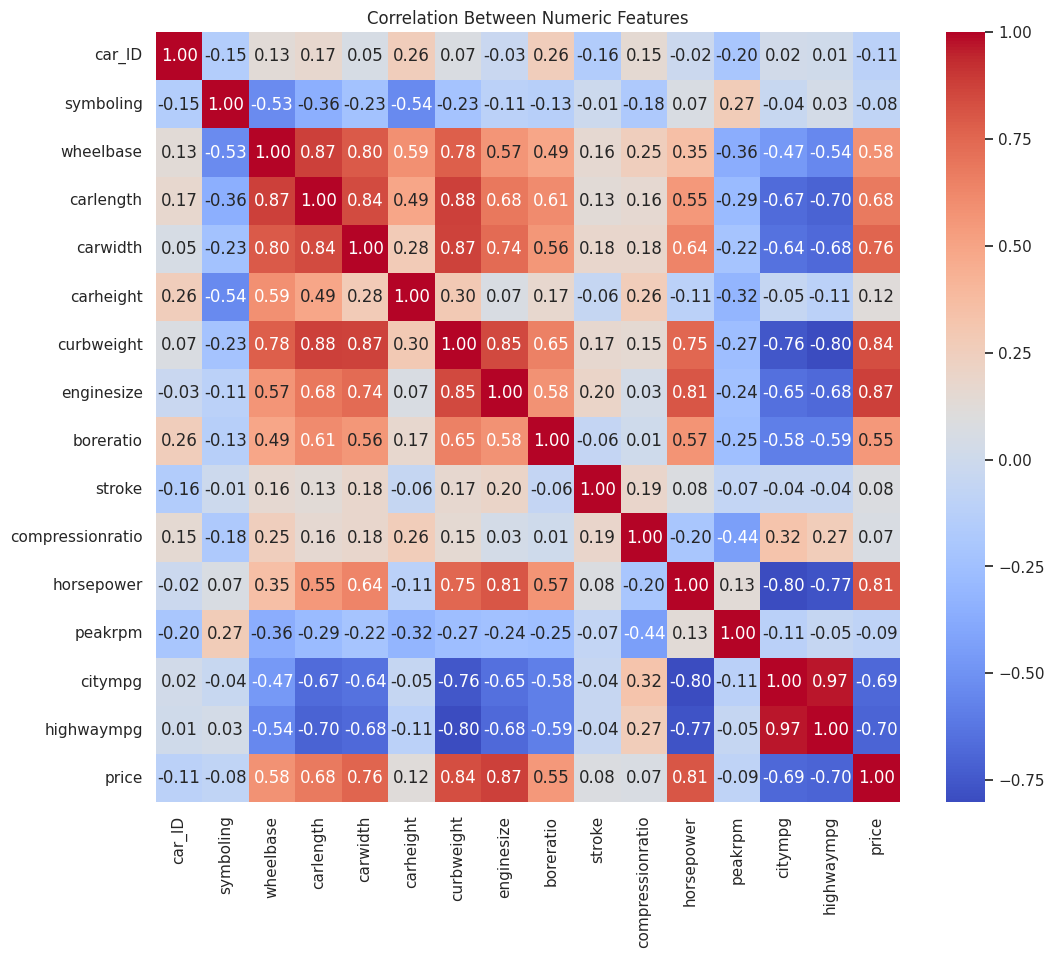

In [10]:
# Correlation Heatmap
numeric_features = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()


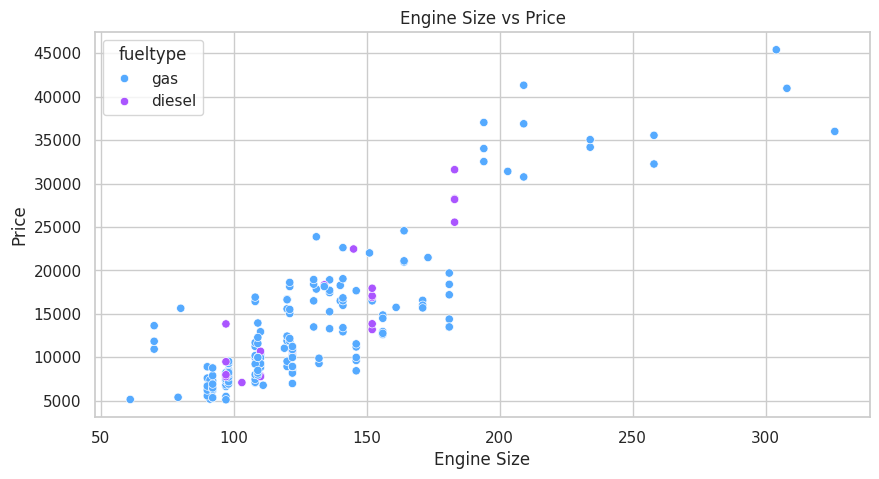

In [11]:
# Engine Size vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='enginesize', y='price', hue='fueltype', palette='cool')
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()



/tmp/ipython-input-12-523267814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fueltype', palette='Set2')


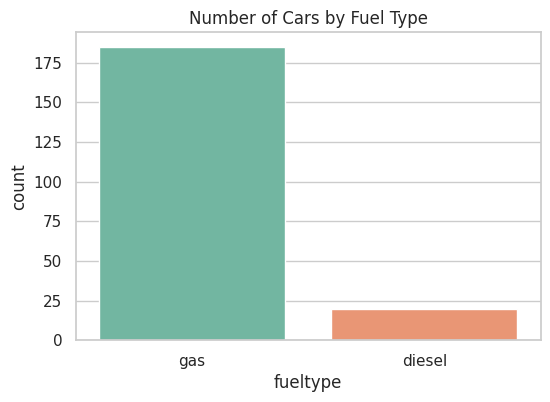

In [12]:
# Fuel Type Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fueltype', palette='Set2')
plt.title('Number of Cars by Fuel Type')
plt.show()


## Step 5: Feature Engineering
We will convert categorical data into numeric format using one-hot encoding so our model can work with it.


In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False


## Step 6: Splitting the Data
We will split the data into `80%` training and `20%` testing so we can evaluate how well our model performs on unseen data.


In [14]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Model Training
Now its time to train a Linear Regression model using `scikit-learn`.


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Step 8: Model Evaluation
Let’s now evaluate how well our model performs using common regression metrics.


In [16]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 3988.29
Mean Squared Error (MSE): 43000397.88
Root Mean Squared Error (RMSE): 6557.47
R² Score: 0.4553


## step 9: Visualizing Actual vs Predicted Prices
A scatter plot can help us quickly see how close our predictions are to the real values.


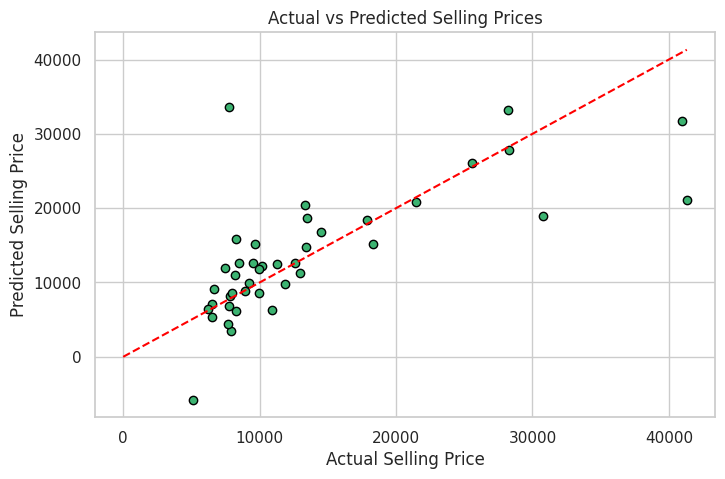

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='mediumseagreen', edgecolors='black')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.show()


In [18]:
import joblib

# Assuming model is named 'model'
joblib.dump(model, 'car_price_model.pkl')
print("Model saved successfully.")


Model saved successfully.
